# Pipeline to retrieve DiMSum merge statistics

Note: the first steps are ran on the server to generate the merge_stats.csv file.

## Import packages

In [4]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'

## Initialize variables

In [5]:
# Paths on the server
dimsum_output_folder = '/home/rodur28/novaseq_run2_py/'

# Relative paths in the repo
data_path = '../data/'
readinfo_path = '../data/20220929_NovaSeq_DMS_pools_v2.xlsx'
diagnostics_graph_outpath = '../diagnostics_graphs/'

# Script to run on server

## Get statistics

In [3]:
list_df = []
for f in glob.glob(dimsum_output_folder+'/*/'):
    df = pd.DataFrame()
    experiment = f.split('/')[-2]
    for i, r in enumerate(glob.glob(f+'/tmp/3_align/*report')):
        sample_name = r.split('/')[-1].split('_')[0]
        split_nb = r.split('/')[-1].split('_')[-1].split('.')[0]
        with open(r, 'r') as report:
            linestats = report.readlines()[8:16]
        report.close()
        lstats = [l.split() for l in linestats]
        largs = [(' '.join(x[1:]), int(x[0])) for x in lstats]
        largs_dict = dict(largs)
        largs_dict['sample_name'] = sample_name
        largs_dict['split'] = split_nb
        entry = pd.DataFrame(largs_dict, index=[i])
        entry['experiment'] = experiment
        list_df.append(entry)

fulldf = pd.concat(list_df)
dfsort = fulldf.sort_values(by=['experiment', 'sample_name', 'split']).reset_index(drop=True)
dfsort

,Pairs,Merged,Too short,No alignment found,Too many diffs,Overlap too short,Exp.errs. too high,Min Q too low,sample_name,split,experiment
0,9573693,8963421,0,3522,0,0,83938,522812,input1,split1,BY4741_FKS1-HS1_double_anidulafungin
1,9412960,8688258,0,4468,0,0,90349,629885,input1,split2,BY4741_FKS1-HS1_double_anidulafungin
2,4054787,3752506,0,1970,0,0,37293,263018,input1,split3,BY4741_FKS1-HS1_double_anidulafungin
3,9616847,9022341,0,2790,0,0,73399,518317,input2,split1,BY4741_FKS1-HS1_double_anidulafungin
4,9416858,8705619,0,3676,0,0,80242,627321,input2,split2,BY4741_FKS1-HS1_double_anidulafungin
...,...,...,...,...,...,...,...,...,...,...,...
84,3825199,3628151,0,1824,0,0,21045,174179,output3none1,split2,R1158_FKS2-HS2_double_none
85,9944720,9445525,0,3911,0,0,50429,444855,output3none2,split1,R1158_FKS2-HS2_double_none
86,2623112,2490035,0,1028,0,0,14075,117974,output3none2,split2,R1158_FKS2-HS2_double_none
87,9943413,9422127,0,4493,0,0,53539,463254,output3none3,split1,R1158_FKS2-HS2_double_none


## Aggregate split chunks

In [4]:
gby = fulldf.groupby(['experiment', 'sample_name']).agg('sum').reset_index()
gby

,experiment,sample_name,Pairs,Merged,Too short,No alignment found,Too many diffs,Overlap too short,Exp.errs. too high,Min Q too low,split
0,BY4741_FKS1-HS1_double_anidulafungin,input1,23041440,21404185,0,9960,0,0,211580,1415715,split2split3split1
1,BY4741_FKS1-HS1_double_anidulafungin,input2,22226829,20693608,0,7695,0,0,179215,1346311,split3split1split2
2,BY4741_FKS1-HS1_double_anidulafungin,input3,27030452,25320101,0,11450,0,0,233155,1465746,split1split3split2
3,BY4741_FKS1-HS1_double_anidulafungin,output1anidulafungin1,20684235,19027302,0,9965,0,0,201515,1445453,split1split3split2
4,BY4741_FKS1-HS1_double_anidulafungin,output1anidulafungin2,25019616,23101283,0,15239,0,0,264335,1638759,split3split1split2
5,BY4741_FKS1-HS1_double_anidulafungin,output1anidulafungin3,21503909,19491546,0,13029,0,0,240584,1758750,split3split2split1
6,BY4741_FKS1-HS1_double_anidulafungin,output2anidulafungin1,20684235,19027302,0,9965,0,0,201515,1445453,split1split3split2
7,BY4741_FKS1-HS1_double_anidulafungin,output2anidulafungin2,25019616,23101283,0,15239,0,0,264335,1638759,split1split3split2
8,BY4741_FKS1-HS1_double_anidulafungin,output2anidulafungin3,21503909,19491546,0,13029,0,0,240584,1758750,split3split1split2
9,BY4741_FKS1-HS1_double_anidulafungin,output3anidulafungin1,20684235,19027302,0,9965,0,0,201515,1445453,split1split2split3


## Calculate ratios

In [5]:
proportions = gby.loc[:, 'Pairs':].div(gby.Pairs, axis=0)
proportions.rename(columns=lambda x: 'Ratio '+x, inplace=True)
proportions


KeyboardInterrupt



## Export dataframe

In [ ]:
dfexport = pd.concat([gby, proportions], axis=1)
dfexport

In [ ]:
dfexport.to_csv(dimsum_output_folder+'/merge_stats.csv')

# Post-processing

In [6]:
dfimport = pd.read_csv(f'{data_path}/merge_stats.csv', index_col=0)
dfimport

,experiment,sample_name,Pairs,Merged,Too short,No alignment found,Too many diffs,Overlap too short,Exp.errs. too high,Min Q too low,Ratio Pairs,Ratio Merged,Ratio Too short,Ratio No alignment found,Ratio Too many diffs,Ratio Overlap too short,Ratio Exp.errs. too high,Ratio Min Q too low
0,BY4741_FKS1-HS1_double_anidulafungin,input1,23620097,21761450,0,33059,45,0,256325,1569218,1.0,0.921311,0.0,0.001400,0.000002,0.0,0.010852,0.066436
1,BY4741_FKS1-HS1_double_anidulafungin,input2,22876785,21124254,0,28005,39,0,219385,1505102,1.0,0.923393,0.0,0.001224,0.000002,0.0,0.009590,0.065792
2,BY4741_FKS1-HS1_double_anidulafungin,input3,27765843,25798503,0,38433,59,0,285137,1643711,1.0,0.929145,0.0,0.001384,0.000002,0.0,0.010269,0.059199
3,BY4741_FKS1-HS1_double_anidulafungin,output1anidulafungin1,21408249,19499748,0,32178,30,0,248887,1627406,1.0,0.910852,0.0,0.001503,0.000001,0.0,0.011626,0.076018
4,BY4741_FKS1-HS1_double_anidulafungin,output1anidulafungin2,25780633,23584417,0,44107,54,0,320120,1831935,1.0,0.914811,0.0,0.001711,0.000002,0.0,0.012417,0.071059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,R1158_FKS2-HS2_single_ortho_none,output2none2,186713,175835,0,261,0,0,1205,9412,1.0,0.941739,0.0,0.001398,0.000000,0.0,0.006454,0.050409
675,R1158_FKS2-HS2_single_ortho_none,output2none3,260944,246790,0,337,0,0,1686,12131,1.0,0.945758,0.0,0.001291,0.000000,0.0,0.006461,0.046489
676,R1158_FKS2-HS2_single_ortho_none,output3none1,199210,187864,0,286,0,0,1269,9791,1.0,0.943045,0.0,0.001436,0.000000,0.0,0.006370,0.049149
677,R1158_FKS2-HS2_single_ortho_none,output3none2,186713,175835,0,261,0,0,1205,9412,1.0,0.941739,0.0,0.001398,0.000000,0.0,0.006454,0.050409


In [7]:
dfimport['experiment'] = dfimport['experiment'].str.replace('single_ortho','single-ortho')

In [8]:
list_attributes = ['strain', 'locus', 'pool_type', 'compound']
dfimport[list_attributes] = dfimport.experiment.apply(lambda x: pd.Series(str(x).split('_')))
dfimport

,experiment,sample_name,Pairs,Merged,Too short,No alignment found,Too many diffs,Overlap too short,Exp.errs. too high,Min Q too low,...,Ratio Too short,Ratio No alignment found,Ratio Too many diffs,Ratio Overlap too short,Ratio Exp.errs. too high,Ratio Min Q too low,strain,locus,pool_type,compound
0,BY4741_FKS1-HS1_double_anidulafungin,input1,23620097,21761450,0,33059,45,0,256325,1569218,...,0.0,0.001400,0.000002,0.0,0.010852,0.066436,BY4741,FKS1-HS1,double,anidulafungin
1,BY4741_FKS1-HS1_double_anidulafungin,input2,22876785,21124254,0,28005,39,0,219385,1505102,...,0.0,0.001224,0.000002,0.0,0.009590,0.065792,BY4741,FKS1-HS1,double,anidulafungin
2,BY4741_FKS1-HS1_double_anidulafungin,input3,27765843,25798503,0,38433,59,0,285137,1643711,...,0.0,0.001384,0.000002,0.0,0.010269,0.059199,BY4741,FKS1-HS1,double,anidulafungin
3,BY4741_FKS1-HS1_double_anidulafungin,output1anidulafungin1,21408249,19499748,0,32178,30,0,248887,1627406,...,0.0,0.001503,0.000001,0.0,0.011626,0.076018,BY4741,FKS1-HS1,double,anidulafungin
4,BY4741_FKS1-HS1_double_anidulafungin,output1anidulafungin2,25780633,23584417,0,44107,54,0,320120,1831935,...,0.0,0.001711,0.000002,0.0,0.012417,0.071059,BY4741,FKS1-HS1,double,anidulafungin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,R1158_FKS2-HS2_single-ortho_none,output2none2,186713,175835,0,261,0,0,1205,9412,...,0.0,0.001398,0.000000,0.0,0.006454,0.050409,R1158,FKS2-HS2,single-ortho,none
675,R1158_FKS2-HS2_single-ortho_none,output2none3,260944,246790,0,337,0,0,1686,12131,...,0.0,0.001291,0.000000,0.0,0.006461,0.046489,R1158,FKS2-HS2,single-ortho,none
676,R1158_FKS2-HS2_single-ortho_none,output3none1,199210,187864,0,286,0,0,1269,9791,...,0.0,0.001436,0.000000,0.0,0.006370,0.049149,R1158,FKS2-HS2,single-ortho,none
677,R1158_FKS2-HS2_single-ortho_none,output3none2,186713,175835,0,261,0,0,1205,9412,...,0.0,0.001398,0.000000,0.0,0.006454,0.050409,R1158,FKS2-HS2,single-ortho,none


## Filter duplicates (same input for all drugs)

In [9]:
dfimport.drop_duplicates('Pairs', inplace=True)
dfimport

,experiment,sample_name,Pairs,Merged,Too short,No alignment found,Too many diffs,Overlap too short,Exp.errs. too high,Min Q too low,...,Ratio Too short,Ratio No alignment found,Ratio Too many diffs,Ratio Overlap too short,Ratio Exp.errs. too high,Ratio Min Q too low,strain,locus,pool_type,compound
0,BY4741_FKS1-HS1_double_anidulafungin,input1,23620097,21761450,0,33059,45,0,256325,1569218,...,0.0,0.001400,0.000002,0.0,0.010852,0.066436,BY4741,FKS1-HS1,double,anidulafungin
1,BY4741_FKS1-HS1_double_anidulafungin,input2,22876785,21124254,0,28005,39,0,219385,1505102,...,0.0,0.001224,0.000002,0.0,0.009590,0.065792,BY4741,FKS1-HS1,double,anidulafungin
2,BY4741_FKS1-HS1_double_anidulafungin,input3,27765843,25798503,0,38433,59,0,285137,1643711,...,0.0,0.001384,0.000002,0.0,0.010269,0.059199,BY4741,FKS1-HS1,double,anidulafungin
3,BY4741_FKS1-HS1_double_anidulafungin,output1anidulafungin1,21408249,19499748,0,32178,30,0,248887,1627406,...,0.0,0.001503,0.000001,0.0,0.011626,0.076018,BY4741,FKS1-HS1,double,anidulafungin
4,BY4741_FKS1-HS1_double_anidulafungin,output1anidulafungin2,25780633,23584417,0,44107,54,0,320120,1831935,...,0.0,0.001711,0.000002,0.0,0.012417,0.071059,BY4741,FKS1-HS1,double,anidulafungin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,R1158_FKS2-HS2_single-ortho_micafungin,output1micafungin2,134266,127398,0,151,0,0,817,5900,...,0.0,0.001125,0.000000,0.0,0.006085,0.043943,R1158,FKS2-HS2,single-ortho,micafungin
660,R1158_FKS2-HS2_single-ortho_micafungin,output1micafungin3,325424,304480,0,522,0,0,2526,17896,...,0.0,0.001604,0.000000,0.0,0.007762,0.054993,R1158,FKS2-HS2,single-ortho,micafungin
670,R1158_FKS2-HS2_single-ortho_none,output1none1,199210,187864,0,286,0,0,1269,9791,...,0.0,0.001436,0.000000,0.0,0.006370,0.049149,R1158,FKS2-HS2,single-ortho,none
671,R1158_FKS2-HS2_single-ortho_none,output1none2,186713,175835,0,261,0,0,1205,9412,...,0.0,0.001398,0.000000,0.0,0.006454,0.050409,R1158,FKS2-HS2,single-ortho,none


In [10]:
dfimport.describe()

,Pairs,Merged,Too short,No alignment found,Too many diffs,Overlap too short,Exp.errs. too high,Min Q too low,Ratio Pairs,Ratio Merged,Ratio Too short,Ratio No alignment found,Ratio Too many diffs,Ratio Overlap too short,Ratio Exp.errs. too high,Ratio Min Q too low
count,2.230000e+02,2.230000e+02,223.0,223.000000,223.000000,223.000000,2.230000e+02,2.230000e+02,223.0,223.000000,223.0,223.000000,2.230000e+02,2.230000e+02,223.000000,223.000000
mean,9.430629e+06,8.525891e+06,0.0,22062.215247,3.246637,0.215247,1.198949e+05,7.627775e+05,1.0,0.910867,0.0,0.002212,3.395016e-07,1.521424e-08,0.011813,0.075107
std,9.995589e+06,9.011316e+06,0.0,46990.942380,11.843087,0.793181,1.941178e+05,1.268817e+06,0.0,0.058825,0.0,0.002158,1.196188e-06,5.814124e-08,0.007886,0.049405
min,1.007800e+04,8.500000e+03,0.0,57.000000,0.000000,0.000000,2.200000e+02,1.301000e+03,1.0,0.470878,0.0,0.000603,0.000000e+00,0.000000e+00,0.003790,0.039066
25%,2.118380e+05,1.951470e+05,0.0,363.500000,0.000000,0.000000,2.010000e+03,1.328850e+04,1.0,0.895513,0.0,0.001146,0.000000e+00,0.000000e+00,0.007558,0.051767
50%,5.030220e+05,4.304970e+05,0.0,3078.000000,0.000000,0.000000,1.215400e+04,5.794200e+04,1.0,0.928789,0.0,0.001515,0.000000e+00,0.000000e+00,0.009444,0.060106
75%,1.832250e+07,1.672554e+07,0.0,25440.000000,1.000000,0.000000,1.852080e+05,1.105726e+06,1.0,0.938120,0.0,0.002649,7.658935e-08,0.000000e+00,0.014470,0.086541
max,3.273414e+07,2.921892e+07,0.0,531575.000000,118.000000,6.000000,1.780943e+06,1.179626e+07,1.0,0.953873,0.0,0.019936,1.249599e-05,5.376393e-07,0.066790,0.442392


In [11]:
dfimport.groupby('pool_type')[['Merged', 'Ratio Merged']].describe()

Merged                                                      \
              count          mean           std        min          25%   
pool_type                                                                 
double        111.0  1.692732e+07  4.697316e+06  1661885.0  13148708.50   
single-ortho  112.0  1.994705e+05  6.085895e+04     8500.0    153815.75   

                                                  Ratio Merged            \
                     50%          75%         max        count      mean   
pool_type                                                                  
double        16819704.0  19964738.50  29218918.0        111.0  0.908833   
single-ortho    195147.0    242566.75    430497.0        112.0  0.912884   

                                                                          
                   std       min       25%       50%       75%       max  
pool_type                                                                 
double        0.068789  0.470878  0.900532  0.928789  0.938863  0.950954  
single-ortho  0.047149  0.551229  0.891750  0.928814  0.935922  0.953873

In [12]:
dfimport[dfimport['Ratio Merged'] < 0.7]

,experiment,sample_name,Pairs,Merged,Too short,No alignment found,Too many diffs,Overlap too short,Exp.errs. too high,Min Q too low,...,Ratio Too short,Ratio No alignment found,Ratio Too many diffs,Ratio Overlap too short,Ratio Exp.errs. too high,Ratio Min Q too low,strain,locus,pool_type,compound
27,BY4741_FKS1-HS1_double_micafungin,output1micafungin1,26664721,12555826,0,531575,118,0,1780943,11796259,...,0.0,0.019936,4.425323e-06,0.0,0.066790,0.442392,BY4741,FKS1-HS1,double,micafungin
161,BY4741_FKS2-HS1_double_none,input2,18224396,10758977,0,205774,1,0,873212,6386432,...,0.0,0.011291,5.487150e-08,0.0,0.047914,0.350433,BY4741,FKS2-HS1,double,none
224,R1158_FKS1-HS1_double_caspofungin,output1caspofungin2,21288143,11580134,0,273758,2,0,1113285,8320964,...,0.0,0.012860,9.394901e-08,0.0,0.052296,0.390873,R1158,FKS1-HS1,double,caspofungin
439,R1158_FKS1-HS2_single-ortho_none,output1none1,151917,83741,0,2133,0,0,8101,57942,...,0.0,0.014041,0.000000e+00,0.0,0.053325,0.381406,R1158,FKS1-HS2,single-ortho,none


In [13]:
dfimport[dfimport['Merged'] < 1e4]

,experiment,sample_name,Pairs,Merged,Too short,No alignment found,Too many diffs,Overlap too short,Exp.errs. too high,Min Q too low,...,Ratio Too short,Ratio No alignment found,Ratio Too many diffs,Ratio Overlap too short,Ratio Exp.errs. too high,Ratio Min Q too low,strain,locus,pool_type,compound
390,R1158_FKS1-HS2_single-ortho_anidulafungin,input3,10078,8500,0,57,0,0,220,1301,...,0.0,0.005656,0.0,0.0,0.02183,0.129093,R1158,FKS1-HS2,single-ortho,anidulafungin


## Coverage based on exact number of expected variants

In [14]:
expec_dict = {}
for l in ['FKS1-HS1','FKS1-HS2','FKS2-HS1','FKS2-HS2']:
    expec_dict[l] = {}
    vardf = pd.read_csv(f'{data_path}/{l}/{l}_var_df.csv', header=0, index_col=0)
    expec_dict[l]['single-ortho'] = len(vardf[vardf.seq_type.isin(['WT','single','ortho'])
                                             ].groupby('nt_seq')
                                       )
    expec_dict[l]['double'] = len(vardf[vardf.seq_type.isin(['WT','single','double'])
                                       ].groupby('nt_seq')
                                 )

expec_dict

{'FKS1-HS1': {'single-ortho': 334, 'double': 35878},
 'FKS1-HS2': {'single-ortho': 346, 'double': 27594},
 'FKS2-HS1': {'single-ortho': 295, 'double': 28480},
 'FKS2-HS2': {'single-ortho': 315, 'double': 27814}}

In [15]:
dfimport['Coverage'] = dfimport.apply(lambda row: row.Merged / expec_dict[row.locus][row.pool_type], axis=1)

In [16]:
# Median coverage over input replicates
med_cov_input = dfimport[dfimport.sample_name.astype(str).str.contains('input')
                        ].groupby(['strain','locus','pool_type']
                                 )[['Coverage']].median().reset_index()
med_cov_input

,strain,locus,pool_type,Coverage
0,BY4741,FKS1-HS1,double,606.540220
1,BY4741,FKS1-HS1,single-ortho,580.115269
2,BY4741,FKS1-HS2,double,461.297873
3,BY4741,FKS1-HS2,single-ortho,653.349711
4,BY4741,FKS2-HS1,double,572.775211
5,BY4741,FKS2-HS1,single-ortho,718.088136
6,BY4741,FKS2-HS2,double,475.511936
7,BY4741,FKS2-HS2,single-ortho,773.260317
8,R1158,FKS1-HS1,double,574.570322
9,R1158,FKS1-HS1,single-ortho,731.523952


In [17]:
# Average coverage for each pool_type
avcov = med_cov_input.groupby('pool_type')[['Coverage']].mean().reset_index()
avcov

,pool_type,Coverage
0,double,523.546842
1,single-ortho,617.244807


## Requested vs obtained **raw** reads

In [18]:
readdf = pd.read_excel(readinfo_path, header=0, skipfooter=2)
readdf

,plate,well,strain,id,nanuq_id,i5_full_seq,i5_barcode,i5_index,i7_full_seq,i7_barcode,...,pmol_to_add,dilution factor,volume,obtained_nb_reads,obtained_%run,file_basename,Unnamed: 30,total_reads,800000000,Unnamed: 33
0,3,A7,BY4741,1,BY4741_1,AATGATACGGCGACCACCGAGATCTACACTTGAGCTCTCGTCGGCA...,TTGAGCTC,B501,CAAGCAGAAGACGGCATACGAGATCAGGATGTGTCTCGTGGGCTCGG,CAGGATGT,...,0.000833,200,1.812794,250628,0.000115,NS.2013.002.B715---B501.BY4741_1,NaN,pool_concentration (nM),14.000000,NaN
1,3,D7,BY4741,10,BY4741_10,AATGATACGGCGACCACCGAGATCTACACTGTCAGTGTCGTCGGCA...,TGTCAGTG,B504,CAAGCAGAAGACGGCATACGAGATCAGGATGTGTCTCGTGGGCTCGG,CAGGATGT,...,0.000833,200,1.697462,120483,0.000055,NS.2013.002.B715---B504.BY4741_10,NaN,total_volume (uL),600.000000,NaN
2,3,F8,BY4741,11,BY4741_11,AATGATACGGCGACCACCGAGATCTACACTATGACCGTCGTCGGCA...,TATGACCG,B506,CAAGCAGAAGACGGCATACGAGATGTAAGCACGTCTCGTGGGCTCGG,GTAAGCAC,...,0.000833,200,2.211300,132183,0.000061,NS.2013.002.B716---B506.BY4741_11,NaN,water_to_add (uL),9.471176,NaN
3,1,C1,BY4741,12,BY4741_12,AATGATACGGCGACCACCGAGATCTACACCCTATCCTTCGTCGGCA...,CCTATCCT,D503,CAAGCAGAAGACGGCATACGAGATCGAGTAATGTCTCGTGGGCTCGG,CGAGTAAT,...,0.000833,200,3.200688,242791,0.000112,NS.2013.002.D701---D503.BY4741_12,NaN,NaN,NaN,NaN
4,1,D1,BY4741,13,BY4741_13,AATGATACGGCGACCACCGAGATCTACACGGCTCTGATCGTCGGCA...,GGCTCTGA,D504,CAAGCAGAAGACGGCATACGAGATCGAGTAATGTCTCGTGGGCTCGG,CGAGTAAT,...,0.088726,1,1.430498,23685933,0.010887,NS.2013.002.D701---D504.BY4741_13,NaN,Pool of non diluted samples,NaN,34.790627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,3,G6,R1158,44+47,R1158_PC_44-47,AATGATACGGCGACCACCGAGATCTACACAATTCCGGTCGTCGGCA...,AATTCCGG,B507,CAAGCAGAAGACGGCATACGAGATTGGAAGCAGTCTCGTGGGCTCGG,TGGAAGCA,...,0.068705,4,2.130298,10969206,0.005042,NS.2013.002.B714---B507.R1158_PC_44-47,NaN,NaN,NaN,NaN
219,3,H6,R1158,45+48,R1158_PC_45-48,AATGATACGGCGACCACCGAGATCTACACGTCAGTCATCGTCGGCA...,GTCAGTCA,B508,CAAGCAGAAGACGGCATACGAGATTGGAAGCAGTCTCGTGGGCTCGG,TGGAAGCA,...,0.068705,4,2.735733,1933116,0.000889,NS.2013.002.B714---B508.R1158_PC_45-48,NaN,NaN,NaN,NaN
220,3,D4,R1158,7+10,R1158_PC_7-10,AATGATACGGCGACCACCGAGATCTACACTGTCAGTGTCGTCGGCA...,TGTCAGTG,B504,CAAGCAGAAGACGGCATACGAGATTGCCTCAAGTCTCGTGGGCTCGG,TGCCTCAA,...,0.088726,4,3.080432,23037430,0.010589,NS.2013.002.B712---B504.R1158_PC_7-10,NaN,NaN,NaN,NaN
221,3,E4,R1158,8+11,R1158_PC_8-11,AATGATACGGCGACCACCGAGATCTACACCGAATTGCTCGTCGGCA...,CGAATTGC,B505,CAAGCAGAAGACGGCATACGAGATTGCCTCAAGTCTCGTGGGCTCGG,TGCCTCAA,...,0.088726,4,2.981867,16381783,0.007530,NS.2013.002.B712---B505.R1158_PC_8-11,NaN,NaN,NaN,NaN


In [19]:
readcomp = readdf.groupby('pool_type')[['nb_reads','obtained_nb_reads']].mean().reset_index()
readcomp['coverage_gain_fold'] = readcomp['obtained_nb_reads'] / readcomp['nb_reads']
readcomp

,pool_type,nb_reads,obtained_nb_reads,coverage_gain_fold
0,double,7.129292e+06,1.936184e+07,2.715816
1,single_ortho,7.721970e+04,2.360462e+05,3.056814


In [20]:
min_per_type = readdf.groupby('pool_type').agg(min_val = ('obtained_nb_reads', 'min'))
min_per_type_val = min_per_type.min_val.tolist()
readdf[readdf.obtained_nb_reads.isin(min_per_type_val)]

,plate,well,strain,id,nanuq_id,i5_full_seq,i5_barcode,i5_index,i7_full_seq,i7_barcode,...,pmol_to_add,dilution factor,volume,obtained_nb_reads,obtained_%run,file_basename,Unnamed: 30,total_reads,800000000,Unnamed: 33
202,3,A5,R1158,15+18,R1158_PC_15-18,AATGATACGGCGACCACCGAGATCTACACTTGAGCTCTCGTCGGCA...,TTGAGCTC,B501,CAAGCAGAAGACGGCATACGAGATAACTGAGGGTCTCGTGGGCTCGG,AACTGAGG,...,0.000862,200,2.104298,16267,0.000007,NS.2013.002.B713---B501.R1158_PC_15-18,NaN,NaN,NaN,NaN
219,3,H6,R1158,45+48,R1158_PC_45-48,AATGATACGGCGACCACCGAGATCTACACGTCAGTCATCGTCGGCA...,GTCAGTCA,B508,CAAGCAGAAGACGGCATACGAGATTGGAAGCAGTCTCGTGGGCTCGG,TGGAAGCA,...,0.068705,4,2.735733,1933116,0.000889,NS.2013.002.B714---B508.R1158_PC_45-48,NaN,NaN,NaN,NaN


## Plots

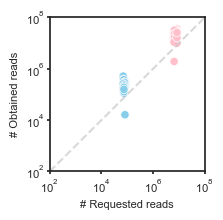

In [21]:
sns.set(rc = {'figure.figsize':(2,2),
              'font.family':'Arial',
              'font.size':8,
              'legend.title_fontsize':8, 'legend.fontsize':8,
              'axes.labelsize':8,'axes.titlesize':8,
              'xtick.labelsize':8, 'ytick.labelsize':8,
              'xtick.major.pad':2, 'ytick.major.pad':2,
              'xtick.bottom': True, 'ytick.left': True,
              'xtick.major.size':2, 'ytick.major.size':2,
             },
       style='ticks')

fig = sns.scatterplot(data=readdf, x='nb_reads', y='obtained_nb_reads',
                  hue='pool_type', hue_order=['single_ortho','double'], palette=['skyblue','pink'],
                  legend=False
                 )

fig.set(xscale = 'log', yscale = 'log',
        xlim=(1e2,1e8), ylim=(1e2,1e8),
        xlabel='# Requested reads', ylabel='# Obtained reads'
       )

fig.plot(fig.get_xlim(), fig.get_ylim(), ls="--", c=".7", alpha=.5)

plt.savefig(f'{diagnostics_graph_outpath}/obtained_reads_stats.svg', format='svg', dpi=300)

Version with only NNK + orthos

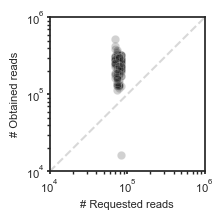

In [26]:
sns.set(rc = {'figure.figsize':(2,2),
              'font.family':'Arial',
              'font.size':8,
              'legend.title_fontsize':8, 'legend.fontsize':8,
              'axes.labelsize':8,'axes.titlesize':8,
              'xtick.labelsize':8, 'ytick.labelsize':8,
              'xtick.major.pad':2, 'ytick.major.pad':2,
              'xtick.bottom': True, 'ytick.left': True,
              'xtick.major.size':2, 'ytick.major.size':2,
              'xtick.minor.size':2, 'ytick.minor.size':2
             },
       style='ticks')

fig = sns.scatterplot(data=readdf[readdf.pool_type == 'single_ortho'], x='nb_reads', y='obtained_nb_reads',
                      color='k', alpha=.2, legend=False)

fig.set(xscale = 'log', yscale = 'log',
        xlim=(1e4,1e6), ylim=(1e4,1e6),
        xlabel='# Requested reads', ylabel='# Obtained reads'
       )

fig.plot(fig.get_xlim(), fig.get_ylim(), ls="--", c=".7", alpha=.5)

plt.savefig(f'{diagnostics_graph_outpath}/obtained_reads_stats_NNK.svg', format='svg', dpi=300)

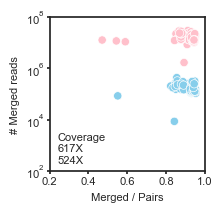

In [23]:
sns.set(rc = {'figure.figsize':(2,2),
              'font.family':'Arial',
              'font.size':8,
              'legend.title_fontsize':8, 'legend.fontsize':8,
              'axes.labelsize':8,'axes.titlesize':8,
              'xtick.labelsize':8, 'ytick.labelsize':8,
              'xtick.major.pad':2, 'ytick.major.pad':2,
              'xtick.bottom': True, 'ytick.left': True,
              'xtick.major.size':2, 'ytick.major.size':2,
             },
       style='ticks')

fig = sns.scatterplot(data=dfimport, x='Ratio Merged', y='Merged',
                      hue='pool_type', hue_order=['single-ortho','double'], palette=['skyblue','pink'],
                      legend=False
                     )

fig.set(yscale = 'log',
        xlim=(0.2,1), ylim=(1e2,1e8),
        xlabel='Merged / Pairs', ylabel='# Merged reads'
       )

covd, covs = avcov.Coverage
fig.annotate(f'Coverage\n{covs:.0f}X\n{covd:.0f}X',(.05,.05), xycoords='axes fraction')

plt.savefig(f'{diagnostics_graph_outpath}/merged_stats.svg', format='svg', dpi=300)

Version with only NNK + orthos

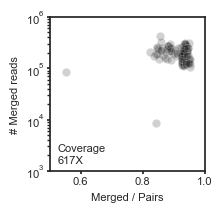

In [27]:
sns.set(rc = {'figure.figsize':(2,2),
              'font.family':'Arial',
              'font.size':8,
              'legend.title_fontsize':8, 'legend.fontsize':8,
              'axes.labelsize':8,'axes.titlesize':8,
              'xtick.labelsize':8, 'ytick.labelsize':8,
              'xtick.major.pad':2, 'ytick.major.pad':2,
              'xtick.bottom': True, 'ytick.left': True,
              'xtick.major.size':2, 'ytick.major.size':2,
              'xtick.minor.size':2, 'ytick.minor.size':2
             },
       style='ticks')

fig = sns.scatterplot(data=dfimport[dfimport.pool_type == 'single-ortho'], x='Ratio Merged', y='Merged',
                      color='k', alpha=.2, legend=False)

fig.set(yscale = 'log',
        xlim=(0.5,1), ylim=(1e3,1e6),
        xlabel='Merged / Pairs', ylabel='# Merged reads'
       )

covd, covs = avcov.Coverage
fig.annotate(f'Coverage\n{covs:.0f}X',(.05,.05), xycoords='axes fraction')

plt.savefig(f'{diagnostics_graph_outpath}/merged_stats_NNK.svg', format='svg', dpi=300)